# Analyzing Factors Affecting Final Grade and Predicting Student Performance

Author:Austin Wu

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction

Introduce your project here.  Maybe 3 sentences.

In [5]:
#My project is to explore how education habits. I will analyze variables such as academic reading on the weekends, 
#scholarship type, taking notes in class, and how these might influence a student's final grade
#Using this relation, I want to try to build a model to try and predict a potential student's 
#grades based on their educational habits. 

The following information was taken from the kaggle website listed below and describes what the number in each of the columns represent. 

Additional Information

1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.

Class Labels

Student ID

1- Student Age (1: 18-21, 2: 22-25, 3: above 26)

2- Sex (1: female, 2: male)

3- Graduated high-school type: (1: private, 2: state, 3: other)

4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)

5- Additional work: (1: Yes, 2: No)

6- Regular artistic or sports activity: (1: Yes, 2: No)

7- Do you have a partner: (1: Yes, 2: No)

8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)

9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)

10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)

11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)

14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)

15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)

16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)

18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)

21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)

22- Attendance to classes (1: always, 2: sometimes, 3: never)

23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)

24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)

25- Taking notes in classes: (1: never, 2: sometimes, 3: always)

26- Listening in classes: (1: never, 2: sometimes, 3: always)

27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)

28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)

29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

31- Course ID

32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

## 1. Loading and cleaning the data

In [6]:
import pandas as pd

df = pd.read_csv('data.csv')
df = df.dropna()
df['Factors'] = df['17'] + df['19'] + df['4']
print (df.columns)
COL = ['4', '17', '19', 'Factors', 'STUDENT ID', 'GRADE', '29', '25', '26']
df = df[COL]
df

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE',
       'Factors'],
      dtype='object')


,4,17,19,Factors,STUDENT ID,GRADE,29,25,26
0,3,3,2,8,STUDENT1,1,1,3,2
1,3,2,2,7,STUDENT2,1,2,3,2
2,3,2,2,7,STUDENT3,1,2,2,2
3,3,3,2,8,STUDENT4,1,3,3,2
4,3,2,1,6,STUDENT5,1,2,2,2
...,...,...,...,...,...,...,...,...,...
140,3,3,2,8,STUDENT141,5,3,2,1
141,4,3,2,9,STUDENT142,5,5,3,2
142,4,2,2,8,STUDENT143,1,4,3,3
143,4,2,1,7,STUDENT144,4,5,2,1


Here, I use pandas to not just  read and store the data, I use it to clean the data a little bit, dropping rows with missing values and narrowing my dataframe. I also use pandas to create a new column, called Factors, that combines the score of weekly study hours, reading frequency, and scholarship type. In this case, the higher the factor score, the more "successful" a student is in this case.  

## 2. Using visuals to analyze the data 

In [7]:
import altair as alt
df['GPA_numeric'] = df['29']
hist = alt.Chart(df).mark_bar().encode(
    x=alt.X('GPA_numeric:O', axis=alt.Axis(title='GPA Range')),
    y=alt.Y('count():Q', axis=alt.Axis(title='Frequency'))
).properties(
    title='Distribution of Cumulative GPA in the Last Semester'
)
hist = hist.configure_axisX(labelAngle=0) 
hist

alt.Chart(...)

I used a histogram to show the distribution of the GPA range. The distribution of this graph seems to be bimodal and roughly symmetric. This graph tells us that most student's previously had either a D (Failing) or have a B. 

In [8]:
import pandas as pd
import altair as alt
import numpy as np

subset_df = df[['19', '17', '25']]
corrmat = subset_df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
corrmat = corrmat.stack().reset_index(name='value')
heatmap = alt.Chart(corrmat).mark_rect().encode(
    x='level_0:N',
    y='level_1:N',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='blueorange'), title='Correlation'),
).properties(
    width=400, 
    height=400, 
    title='Correlation Heatmap for Reading, Study Hours, and Note-Taking'
).transform_filter(
    alt.datum.level_0 != alt.datum.level_1 
)

heatmap


alt.Chart(...)

The correlation map above shows us the comparisons between the amount of reading they do, how much they study weekly, and how often they take notes in class. There is a higher correlation between the reading frequency of scientific texts and journals and weekly study hours, while there is a lower correlation between reading frequency of scientific texts and journals and taking notes in class. 

In [9]:
import altair as alt
chart = alt.Chart(df).mark_bar().encode(
    x='STUDENT ID:O', 
    y='Factors:Q'  
)
chart = chart + \
    alt.Chart(df).mark_text(dx=-15, dy=10, align='left', baseline='middle').encode(
        x=alt.value(0), 
        text='xlabel:N'
    ) + \
    alt.Chart(df).mark_text(dx=0, dy=-10, align='left', baseline='middle').encode(
        y=alt.value(0),
        text='ylabel:N'
    )
chart = chart.properties(
    title='Student ID vs. Factors'
)
chart


alt.LayerChart(...)

Using the dataframe we created above called the "Factors"  column , I created a bar chart to see what the distribution of "successful" students would be". In our dataset, the higher number in each column, the more "successful" they are perceived to be, as in, with a better scholarship, studies more often, reads more in their free time, etc. By summing the numbers of specific factors, we are able to use it as a sort of metric to judge how "good" of a student someone is. 

In [10]:
bchart = alt.Chart(df).mark_bar(color='orange').encode(
    x='STUDENT ID:O',
    y='GRADE:Q'
).properties(
    title='Student ID vs. Course Grade'
)
bchart

alt.Chart(...)

The orange graph above is scaled the same as our blue graph that compares how "successful" they are. The orange graph shows how good a student's grade is. The highest grade is a 7(AA) and the lowest grade is a 0 (Fail). There doesn't seem to be an association between the chosen factors above (in total) versus how high of a grade a student obtains because there are students who have a high factor score but had a low grade (STUDENT94) and there are students who have a low factor score but had a high grade (STUDENT78). 

## Machine Learning

### 1. Using Logistic Regression

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['4', '17', '19', '29', '25', '26']]
y = df['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
xtrains = scaler.fit_transform(X_train)
xtests = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(xtrains, y_train)
y_pred = model.predict(xtests)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.14
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.15      0.67      0.25         3
           2       0.00      0.00      0.00         4
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         3
           5       0.14      0.33      0.20         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2

    accuracy                           0.14        29
   macro avg       0.10      0.15      0.09        29
weighted avg       0.13      0.14      0.10        29

Confusion Matrix:
[[0 2 1 1 0 0 0 0]
 [0 2 1 0 0 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 2 0 1 0 3 0 0]
 [0 2 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 1]
 [0 0 2 0 1 1 0 0]
 [0 1 0 0 0 1 0 0]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score

Using what I learned in class, I attempted to try to create a logistic regression model based on the following factors:

 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)  

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours) 

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

 25- Taking notes in classes: (1: never, 2: sometimes, 3: always) 

26- Listening in classes: (1: never, 2: sometimes, 3: always)

The variable that the model is trying to predict is the Grade. 

My accuracy was only  14%, and because of how for most of the grade classes, the precision is low, it shows how the model is making a lot of false positive predictions. It only performs better at grade 3. I first split the data into training and testing sets. This way, I reserve some of the data for training purposes, while also having a bit of data left to test my model against unseen data for a more realistic generalization. This helps the model avoid overfitting. 

### 2. Using KNN (K-Nearest Neighbors) 

In [12]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df[['4', '17', '19', '25', '26']]  
y = df['GRADE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
knnxtrains = scaler.fit_transform(X_train)
knnxtests = scaler.transform(X_test)


k = 5  
knnclass = KNeighborsClassifier(n_neighbors=k)
knnclass.fit(knnxtrains, y_train)


y_pred = knnclass.predict(knnxtests)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)


Accuracy: 0.21
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.12      0.67      0.20         3
           2       0.20      0.25      0.22         4
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2

    accuracy                           0.21        29
   macro avg       0.29      0.21      0.18        29
weighted avg       0.33      0.21      0.20        29

Confusion Matrix:
 [[1 2 0 0 0 0 0 1]
 [0 2 0 1 0 0 0 0]
 [0 3 1 0 0 0 0 0]
 [0 4 1 1 0 0 0 0]
 [0 1 1 0 0 0 1 0]
 [0 2 0 0 0 1 0 0]
 [0 2 1 0 0 1 0 0]
 [0 1 1 0 0 0 0 0]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-sco

I first select 5 features for this. 

 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)  

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours) 

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

 25- Taking notes in classes: (1: never, 2: sometimes, 3: always) 

26- Listening in classes: (1: never, 2: sometimes, 3: always)

My target variable was the final grade of the student. 

I scaled the features. Due to how KNN relies on distance to determine the how close data points are, by scaling the features to a common range it makes all the features proportional for calculations. 

The accuracy of my model is 21%, meaning that it correctly predicted the output grade for 21% of the students in the set. My model had the highest true positive prediction for Grade AA (of 1) while the other grades were much less successful. From the confusion matrix, I can see that the model picks Grade 1 (DD) and Grade 2(DC) often and there are false positives and false negatives throughout the entire range of grades. 

### 3. Using Decision Trees

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X = df[['4', '17', '19', '25', '26']]  
y = df['GRADE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)


y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

Accuracy: 0.17
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.25      0.38      0.30         8
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.17        29
   macro avg       0.19      0.10      0.12        29
weighted avg       0.25      0.17      0.18        29

Confusion Matrix:
 [[1 1 0 0 0 1 0 1]
 [0 3 2 2 0 0 1 0]
 [0 1 1 1 0 2 0 0]
 [0 3 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 3]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0 0]]


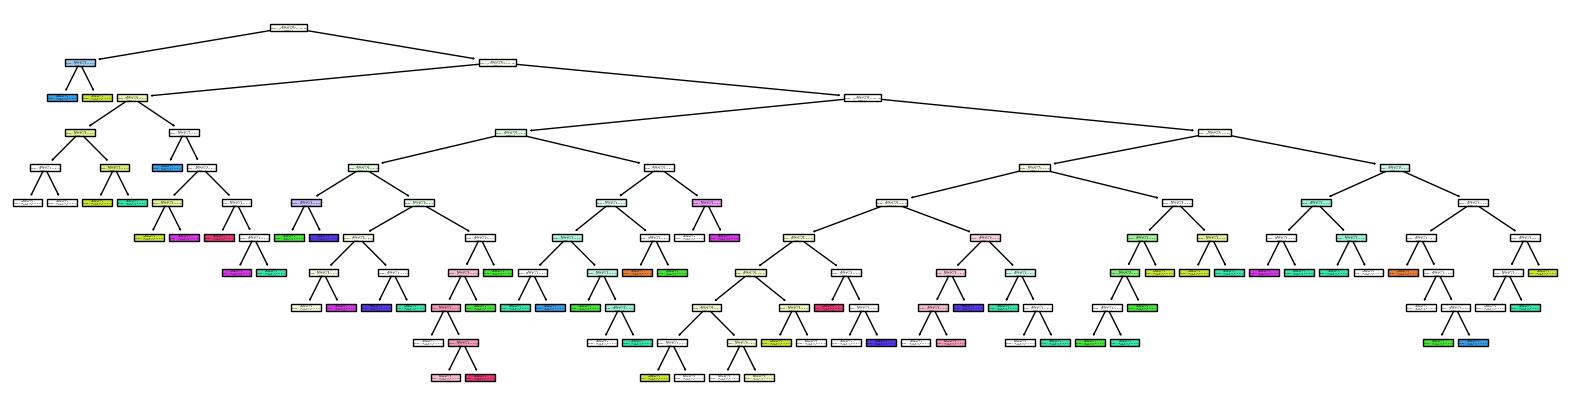

In [14]:
plt.figure(figsize=(20, 5))
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(i) for i in decision_tree.classes_], filled=True)
plt.show()

I first select 5 features for this. 

 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)  

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours) 

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

 25- Taking notes in classes: (1: never, 2: sometimes, 3: always) 

26- Listening in classes: (1: never, 2: sometimes, 3: always)

My target variable was the final grade of the student. 

I train the decision tree model using the training data. After training and evaluating the model, I tried to plot the decision tree to see how the model is thinking and where the decisions are coming from. Our prediction accuracy is 17%, which is around 4% lower then if we used KNN. However, in comparison to KNN, it has a higher accuracy for Grade 1 and Grade 2. The very large tree could be hinting at small overfitting at some places while also showing that the data is deep and have complex relationships between each feature. 

## Summary

First, I used pandas to clean the data, removing the rows that I am not currently using and dropping empty columns. Then, I used Altair to make some visualizations on the data, creating a histogram of the grade distributions, comparing how much hard work the student put into education (Factors) versus their outcome grade, and a correlation heatmap for some of the variables. I then tried three models to try and predict a student's grades: Logistic Regression, KNN, and Decision Trees. Overall, KNN performed the best, at 21%, , with Decision Tree coming in second place at 17%, and Logistic Regression being third, at 14%. Overall, there seems to not be a correlation that can be made from the graphs and models. There is no clear connection between these variables


## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

In [15]:
#https://www.kaggle.com/datasets/joebeachcapital/students-performance

* List any other references that you found helpful.

In [16]:
#https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/#:~:text=A%20decision%20tree%20is%20a,that%20contains%20the%20desired%20categorization.
#https://www.youtube.com/watch?v=UqYde-LULfs

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=653bb212-083a-4543-8189-c36e6a56aab1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>